# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

#Load the dataset
df = pd.read_csv('/.../human_body_temperature.csv')

# Normality Testing 

Check if the body temperature is normally distributed.

- First, plot out body temperature in histogram to have a look at body temperature distribution.

- Then, use Kurtosis normality testing to see if the body temperature is normal distribution.

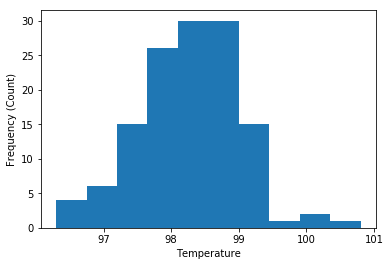

In [52]:
#Check if the body temperature is normally distributed

import matplotlib.pyplot as plt

#Fist, present the body temperatures in histogram
_ = plt.hist(df.temperature)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Frequency (Count)')
plt.show()


From the above histogram, the body temperature seems to be normally distributed. However, we will need to verify our assumption by statistical analysis. Kurtosis is a normality testing that helps us determine if the sample is normal distribution. Kurtosis = 3 means the sample is normal distribution. 


In [24]:
#Second, check for normality using Kurtosis.
from scipy import stats

#k is Kurtosis to test if the data is normally distributed. P is p-value.
#K = 3 is normal distribution.
k, p = stats.mstats.normaltest(df.temperature) 

if p < 0.05:
    print('Not normal distribution')
else:
    print('Normal distribution')
   

Normal distribution


**Is the distribution of body temperature normal?**

Based on Kurtosis normality testing, we can know that the data is normally distributed.


**Is the sample size large? Are the observations independent?**

The sample size is 130 and is bigger than 30. Thus, we can consider the sample size is large enough for our analysis.
The observations are independent since the body temperatures were randomly selected and body temperatures are not categorical variable. So we don't need to check the relationship between two categorical variables.     


# One-sample Z-test

**Should we use one-sample or two-sample test? Why?**
**Use t or z statistic?**

We should use one-sample z-test. We use one-sample test because the sample itself is a single treatment group and 
the goal is to see if the population mean of the treatment group is significant different from 98.6F.
In addition, when the sample size is greater than 30, we should consider using z-test. 

#### One-sample z-test

We will need
- sample size  n
- sample mean  x̄  
- standard deviation  σ
- standard error of mean  σ/√n 
- mean body temperature  μ0 = 98.6

In [25]:
#Now we look into the data to get the basic statistics 
import numpy as np

n = len(df.temperature) #Sample size
print('size: ', n)

mean = np.mean(df.temperature) #Sample mean
print('mean: ', mean)


std = np.std(df.temperature) #Standard deviation
print('standard deviation: ', std)


std_sample = std/np.sqrt(n) #Standard error of mean
print('standard error of mean: ', std_sample)


size:  130
mean:  98.24923076923078
standard deviation:  0.7303577789050377
standard error of mean:  0.0640566146952



The population meas is held to be 98.6F. Calculate z-statistic with hypothesis & alternative hypothesis as following, 
##### H0: μ = 98.6, H1: μ ≠ 98.6


In [31]:
#Z-statistic:
z = (mean-98.6) / (std/np.sqrt(n))
print('Z-statistic: ', z)

#P-value
from scipy.stats import norm
p_values = norm.sf(abs(z))*2 #two-tails
print('p-value: ', p_values) 


Z-statistic:  -5.47592520208
p-value:  4.35231516588e-08


**Is the true population mean really 98.6 degrees F?**

- Based on one-sample z-test, the p-value is 0.0000000435231516588 and z-statistic is -5.47592520208. 

- With 95% confidence interval and p-value is < 0.05, we cannot accept the null hypothesis. 

- Therefore, we consider the true population mean is not 98.6F.

**At what temperature should we consider someone's temperature to be 'abnormal'?**

- The normal body temperature is between [ 98.1236798, 98.37478173 ]

- People with temperatures < 98.1236798 F, or > 98.37478173 F are considered having abnormal body temperature.


**What is the margin of error and confidence interval?**

- The margin of error is **Critical Value * Standard Error of the Sample**

- With 95% of confidence interval, the critical value is 1.96. The SE is 0.0640566146952 as we calculated before.

- The margin of error is 1.96 x 0.0640566146952 

- Confidence interval is [98.6 - 1.96 x 0.0640566146952, 98.6 + 1.96 x 0.0640566146952 ]

In [48]:
#With 95% confidence interval, we can know the normal body temperature is between 98.1236798044 and 98.374781734.
normal_body_temperature_low = mean - 1.96*std_sample 
normal_body_temperature_high = mean + 1.96*std_sample 
print('With 95% confidence interval, the normal body temperature is between ', np.array([normal_body_temperature_low, normal_body_temperature_high]))

#The margin of error is
print('Margin of Error: ', 1.96*std_sample)     


With 95% confidence interval, the normal body temperature is between  [ 98.1236798   98.37478173]
Margin of Error:  0.125550964803


## Male v.s. Female Body Temperature
**Is there a significant difference between males and females in normal temperature?**  

We use paired-sample z-test. Since our goal is to see if there is a significant body temperature difference between males and females.

The null hypothesis is 'the mean body temperature of males and females is not significant different than 0'

##### H0 : male µ = female µ,   H1 : male µ ≠ female µ


In [35]:
#Subset male and female body temperature
male_df = df.loc[df['gender'] == 'M']
female_df = df.loc[df['gender'] == 'F']



#### Paired-sample z-test
We will need male and female

-  sample size n
-  mean body temperature x̄1, x̄2
-  standard deviation σ
-  standard error of the sample σ/√n
-  according to null hypothesis μ1 - μ2 = 0

In [49]:
#Calculate male body temperature  
mean_male_bodyTemperature = np.mean(male_df.temperature)
print('Mean male boby temperature: ', mean_male_bodyTemperature)

#Male sample size
male_sample = len(male_df)
print('Male sample size: ', male_sample)

#Male standard deviation and standard error of the sample
male_std = np.std(male_df.temperature)
male_se = male_std/np.sqrt(male_sample)
print('Male standard deviation: ', male_std)
print('Male standard error of the sample: ', male_se)


#Calculate female mean body temperature  
mean_female_bodyTemperature = np.mean(female_df.temperature)
print('Mean female body temperature: ', mean_female_bodyTemperature)

#Female sample size
female_sample = len(female_df)
print('Female sample size: ', female_sample)

#Female standard deviation and standard error of the sample
female_std = np.std(female_df.temperature)
female_se = female_std/np.sqrt(female_sample)
print('Female standard deviation: ', female_std)
print('Female standard error of the sample: ', female_se)


Mean male boby temperature:  98.1046153846154
Male sample size:  65
Male standard deviation:  0.6933598841828696
Male standard error of the sample:  0.0860007092094
Mean female body temperature:  98.39384615384613
Female sample size:  65
Female standard deviation:  0.7377464486428966
Female standard error of the sample:  0.0915061849516


In [51]:
#Calculate standard error of the differences between male & female
sd_diff = np.sqrt(male_se**2 + female_se**2)

print('Standard error of the differences between male & female is: ', sd_diff)


Standard error of the differences between male & female is:  0.125576685212


In [46]:
#Calculate z-score and p-value
z = ((mean_male_bodyTemperature - mean_female_bodyTemperature) - 0) / sd_diff
p_values = norm.sf(abs(z))*2 #twosided


print('z-score: ', z)
print('p-value: ', p_values)


z-score:  -2.30322028919
p-value:  0.0212664518301


**Finally, is there a significant difference between males and females in normal temperature?**  

- With 95% confidence interval, reject null hypothesis if z < -1.96 or z > 1.96

- z-score is -2.30322028919. Thus, reject null hypothesis since z-score is < -1.96

- The paired-sample z-test tells us that there is a significant difference between male and female body temperature.
